In [1]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as KNN

In [5]:
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [9]:
mnist_data

AttributeError: 'tuple' object has no attribute 'shape'

In [12]:
print(len(mnist_data))
[len(a) for a in mnist_data]


2


[2, 2]

In [32]:
import tensorflow_datasets as tfds
import time
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [33]:
ds_train

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

## New part

In [3]:
from tensorflow.keras.datasets import mnist
import keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))


Sizes...
((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))


In [48]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical

y_train, y_test = to_categorical(y_train), to_categorical(y_test)

#Learning rate reduction
lrr = ReduceLROnPlateau(monitor='accuracy', factor=.01, patience=3, min_lr=1e-5) 

#Model
model1 = ResNet50(include_top=True,weights=None,input_shape=(32,32,3),classes=y_train.shape[1])
#print(model1.summary())

In [2]:
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

NameError: name 'x_train' is not defined

In [103]:
x_train[20][25][3]

0

## 3

In [128]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
#from keras.layers import  Maxpool2D, Dropout
import keras
from tensorflow.keras.optimizers import Adam

n = 5
n_epochs = 10

input_shape = (28,28, 3)

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
#model2.add(MaxPool2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))

model2.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

model2.summary()

#history2 = model2.fit(x_train,y_train, steps_per_epoch=len(x_train) / 32, epochs = n_epochs , validation_data = (x_test, y_test))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 64)        18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


## 4

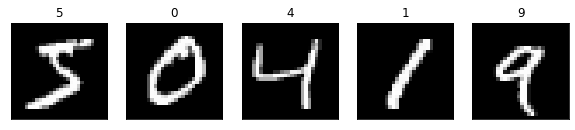

In [115]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [116]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
from tensorflow.keras.utils import to_categorical


# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [149]:
model3 = Sequential()
model3.add(tf.keras.Input(shape=(32,32)))
#model.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(5, activation='relu'))
model3.add(Dense(10, activation='softmax'))

#model3.compile(loss=keras.losses.categorical_crossentropy,
#                  optimizer=tf.keras.optimizers.Adam(),
#                  metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])


model3.summary()


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_51 (ModuleWra (None, 1024)              0         
_________________________________________________________________
module_wrapper_52 (ModuleWra (None, 5)                 5125      
_________________________________________________________________
module_wrapper_53 (ModuleWra (None, 10)                60        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras import Sequential
import keras
from keras.layers import Dense, Flatten

model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(5, activation='sigmoid'))
model4.add(Dense(10, activation='softmax'))

In [11]:
model4.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [15]:
model4.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


ValueError: in user code:

    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


# Cleaned part : 

In [13]:
import numpy as np
import keras
import keras.datasets.mnist
import time

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from keras.layers import Dense, Flatten


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,) 

print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

Sizes...
((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))


In [4]:
# Convert y_train into one-hot format
# !!! Run only once
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

(60000, 10)
(10000, 10)


In [6]:
print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

Sizes...
((60000, 28, 28), (60000, 10))
((10000, 28, 28), (10000, 10))


In [11]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(5, activation='sigmoid'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [14]:
start = time.time()
model4.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))
end = time.time()

Epoch 1/10


ValueError: in user code:

    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/arnaudgucciardi/python-env/tfenv/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_9 (ModuleWrap (32, 784)                 0         
_________________________________________________________________
module_wrapper_10 (ModuleWra (32, 5)                   3925      
_________________________________________________________________
module_wrapper_11 (ModuleWra (32, 10)                  60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("-------------------------------------------------")
print("Benachmark Results for this test")
print()
print("Elapsed Time (min):",(end - start)/60.0)
print("-------------------------------------------------")
